In [276]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold , cross_val_score , train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [277]:
df=pd.read_csv('/content/winequality-red.csv')

In [278]:
df.shape

(1599, 12)

In [ ]:
quality=df['quality']
counts=quality.value_counts().values
Categories=quality.unique()

<BarContainer object of 6 artists>

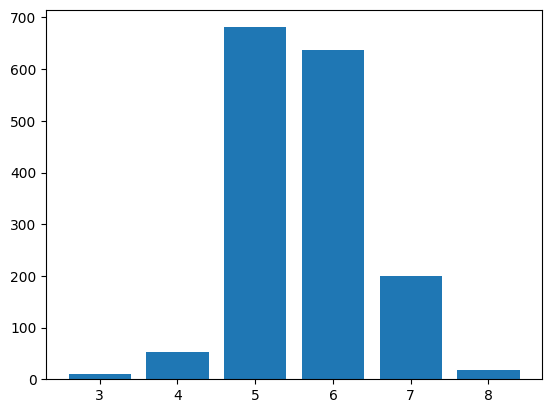

In [280]:
plt.bar(Categories,height=counts)

In [281]:
# not found any null values
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [282]:
# found 240 duplicated rows
df.duplicated().sum()

240

**Preprocessing**

In [283]:
X=df.drop(columns=['quality'])

**Birariztion**

In [284]:
Y=df['quality'].apply(lambda y : 1 if y >=7 else 0)

In [285]:
train_x , test_x, train_y , test_y = train_test_split(X,Y,random_state=1,stratify=Y,test_size=0.3)

**model && Training**

In [286]:
Classifier=RandomForestClassifier(n_estimators=100)

In [287]:
Classifier.fit(train_x,train_y)

RandomForestClassifier()

In [288]:
train_predictions=Classifier.predict(train_x)
test_predictions=Classifier.predict(test_x)

In [289]:
train_prediction_score=accuracy_score(train_predictions,train_y)
test_prediction_score=accuracy_score(test_predictions,test_y)

In [290]:
print(f'train_prediction_score: {train_prediction_score}')
print(f'test_prediction_score:  {test_prediction_score}')

train_prediction_score: 1.0
test_prediction_score:  0.9145833333333333


In [291]:
kf = StratifiedKFold (n_splits=6, shuffle=True, random_state=1)

In [292]:
scores=cross_val_score(Classifier,train_x,train_y,cv=kf,scoring='accuracy')

In [293]:
cross_score=scores.mean()
print('score: ',cross_score)

score:  0.9008107641883734
